# Code

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

## Least Squares

- Creating wave (`Wave`) from the `mglearn` library
- Generates the features `X` and the labels `y` and returns them to the caller

In [36]:
def make_wave(n_samples: int = 100) -> tuple[np.ndarray, np.ndarray]:
	rnd: np.random.RandomState = np.random.RandomState(42)
	x: np.ndarray = rnd.uniform(-3, 3, size=n_samples) 
	y_no_noise: np.ndarray = (np.sin(4 * x) + x) 
	y: np.ndarray = (y_no_noise + rnd.normal(size=len(x))) / 2
	return x.reshape(-1, 1), y # X, y

- Generated wave data `X` and `y` from `make_wave()` are assigned to features `X` and labels `y` 

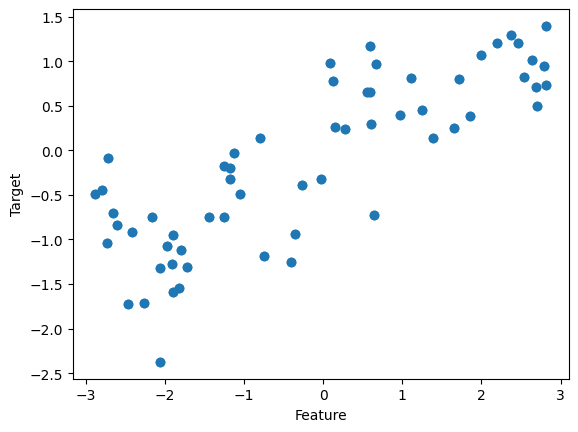

In [37]:
X, y = make_wave(n_samples=60)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.plot(X, y, 'o')
plt.scatter(X, y)

- Splitting data into training and tests sets
- Fitting a linear model to the training set

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
lr = LinearRegression().fit(X_train, y_train)

- Estimated coefficients

In [41]:
lr.coef_

array([0.44153666])

In [42]:
lr.intercept_

-0.01711124414733381

### Score / Model Performance

In [43]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6592061059587275
0.6932519118518162


In [44]:
X_train_ext = np.concatenate([X_train, X_train ** 2], axis=1) # concatenate X_train and X_train ** 2
X_test_ext = np.concatenate([X_test, X_test ** 2], axis=1) # concatenate the original feature with the squared feature

In [45]:
lr = LinearRegression().fit(X_train_ext, y_train)
y_hat = lr.predict(X_test_ext)

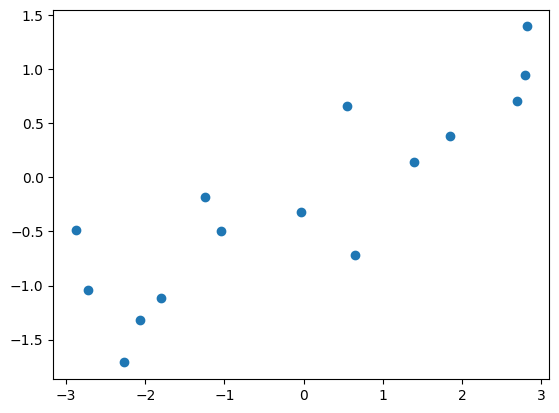

In [46]:
%matplotlib inline
plt.scatter(X_test, y_test)

## Overfitting data

In [47]:
print(lr.score(X_train_ext, y_train)) 
print(lr.score(X_test_ext, y_test))

0.6601817319830376
0.6861923283484095


- To get a clear instance of overfitting, a more complex dataset is required, namely the Boston Housing dataset
- To make the linear model more powerful:
  - Expand this dataset using the 13 original features
  - Look at all products (interactions) between features

In [48]:
def load_extended_boston() -> tuple[np.ndarray, np.ndarray]:
	boston = load_boston()
	X = MinMaxScaler().fit_transform(boston.data)
	X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
	return X, boston.target

In [49]:
X, y = load_extended_boston()
X.shape

/home/maruf/.cache/pypoetry/virtualenvs/anaconda-pOKeClin-py3.10/lib64/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternati

(506, 104)

- Building linear regression model

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [51]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.952051960903273
0.6074721959665879


## Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

In [53]:
ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))

0.8857966585170941


In [54]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369614
0.6359411489177309


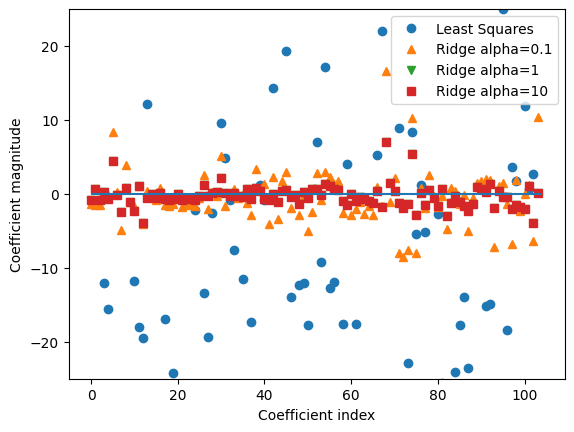

In [55]:
plt.plot(lr.coef_, 'o', label="Least Squares")
plt.plot(ridge.coef_, '^', label="Ridge alpha=0.1")
plt.plot(ridge10.coef_, 'v', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Lasso

In [56]:
from sklearn.linear_model import Lasso

In [57]:
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.29323768991114607
0.20937503255272294


In [58]:
np.sum(lasso.coef_ != 0)

4

In [59]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))

0.8962226511086497


In [60]:
print(np.sum(lasso001.coef_ != 0))

33


In [61]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(lasso00001.score(X_train, y_train))
print(np.sum(lasso00001.coef_ != 0))

0.9507158754515463
96


Text(0, 0.5, 'Coefficient magnitude')

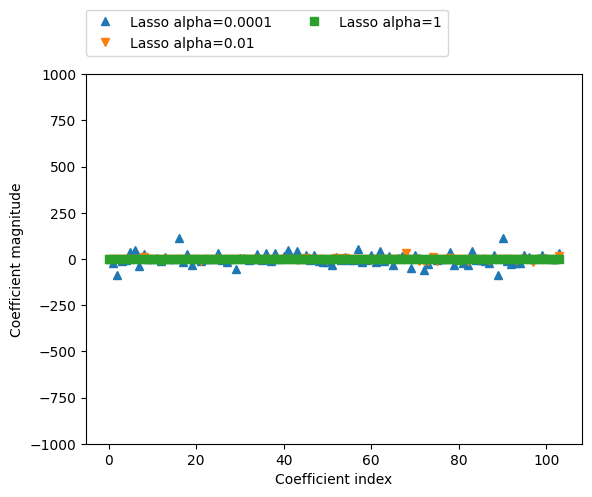

In [62]:
plt.plot(lasso00001.coef_, '^', label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'v', label="Lasso alpha=0.01")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-1000,1000)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Exercise

## Question 1
Comment on the size of the coefficients for different values of $α$ in `Out[19]`. (You might need to vary the range in `plt.ylim`.) Is this what you expected?

- As the size of alpha increases, the data becomes more accurate as the data points get closer

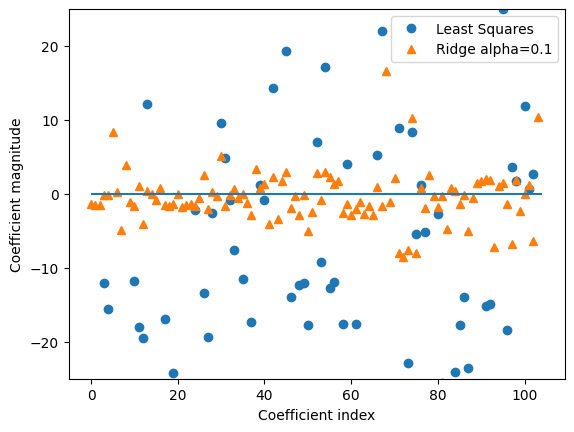

In [63]:
plt.plot(lr.coef_, 'o', label="Least Squares")
plt.plot(ridge.coef_, '^', label="Ridge alpha=0.1")
# plt.plot(ridge10.coef_, 'v', label="Ridge alpha=1")
# plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

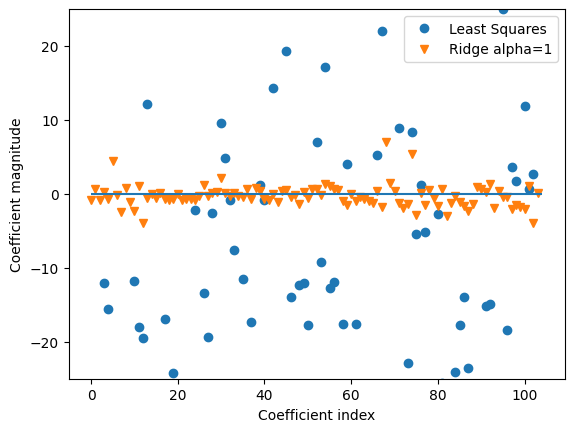

In [65]:
plt.plot(lr.coef_, 'o', label="Least Squares")
# plt.plot(ridge.coef_, '^', label="Ridge alpha=0.1")
plt.plot(ridge10.coef_, 'v', label="Ridge alpha=1")
# plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

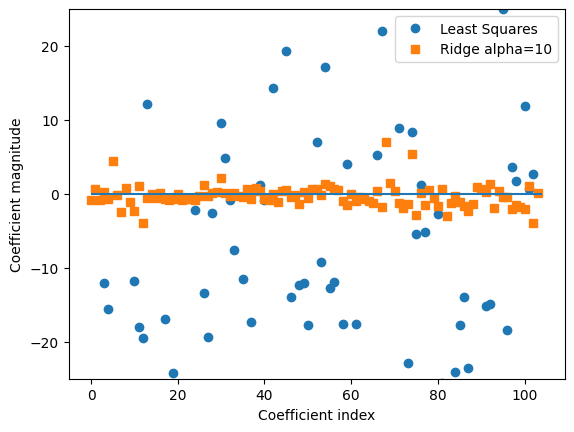

In [67]:
plt.plot(lr.coef_, 'o', label="Least Squares")
# plt.plot(ridge.coef_, '^', label="Ridge alpha=0.1")
# plt.plot(ridge10.coef_, 'v', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Question 2
What is the role of the command `plt.hlines(0,0,len(lr.coef_))` in `In[19]`? (If needed, use help() or `[2]`.)

- `plt.hlines(y,x,length)`
- Draws a horizontal line from:
  - A desired position $y$ (in this case $y=0$)
  - From the beginning of the graph ($x=0$) 
  - Of a certain length in this case the length of the list storing the coefficients 

## Question 3
Comment on the size of the coefficients for different values of $α$ in `Out[29]`. (Do not forget to vary the range in `plt.ylim`.) Is this what you expected? How is this picture different from the one in `In[19]`?

- As seen with the first diagram, as alpha increases so does the consistency of the graph
- For alpha=1, the data seems to be very consistent (could potentially be too consistent or overfitted)

Text(0, 0.5, 'Coefficient magnitude')

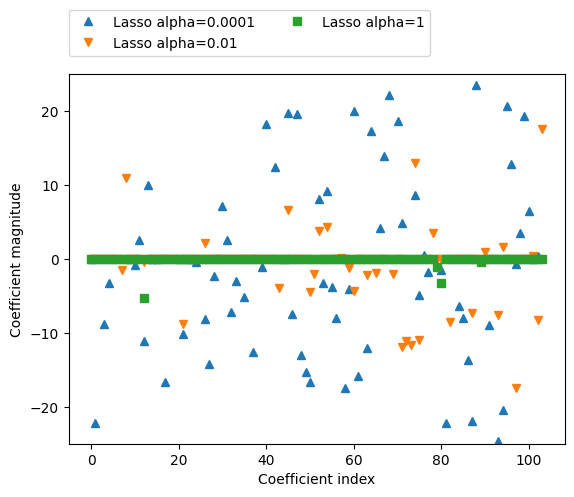

In [69]:
plt.plot(lasso00001.coef_, '^', label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'v', label="Lasso alpha=0.01")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.legend(ncol=2,loc=(0,1.05)) # ncol=2 is the number of columns in the legend, loc=(0,1.05) is the location of the legend in the plot (0,1.05) is the upper left corner 
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## Question 4
Explain what is going on in `np.sum(lasso.coef_ != 0)` in `In[22]`.

- `lasso.coef_` is a list 
- `np.sum()` sums all the elements in the list which are not 0

## Question 5
What is the role of `plt.legend(ncol=2,loc=(0,1.05))` in `In[29]`?

- `ncol=2` is the number of columns in the legend, `loc=(0,1.05)` is the location of the legend in the plot $(0,1.05)$ is the upper left corner